In [1]:
%matplotlib inline

import os, subprocess, tarfile
from glob import glob
import numpy as np
import xarray as xr
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import cartopy
import cartopy.crs as ccrs
from xhistogram.xarray import histogram

import warnings
warnings.filterwarnings('ignore')

seconds_per_day=60.*60.*24.
seconds_per_year=365.*seconds_per_day
carbon_molar_mass=12.011
cobalt_n_2_c = 106./16.
molN_to_gC = 6.625*12.011

In [26]:
path_root='/archive/Jessica.Luo/gz_test/MOM6_SIS2_COBALT'

control='OM4p5_CORE2_IAF_gzCOBALT-013022'
case,machine_target='OM4p5_CORE2_IAF_gzCOBALT-013022_b','gfdl.ncrc4-intel19-prod'

In [27]:
short_casename=case.replace('OM4p5_CORE2_IAF_','')
fig_casename=short_casename
print(short_casename, fig_casename)

gzCOBALT-013022_b gzCOBALT-013022_b


In [28]:
phyto_varlist = ['di', 'smp', 'lgp']
zoo_varlist = ['smz', 'mdz', 'lgz', 'smt', 'lgt']

In [29]:
tmpdir = '/work/Jessica.Luo/tmp/'+case
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022_b


In [30]:
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1968-1972'

files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

files=sorted([f for fi in files for f in fi]) # nested list comprehension
#print(files)

In [31]:
if not files:
    pp_path=os.path.join(path_root, case, machine_target, 'pp')
    
    files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    files=sorted([f for fi in files for f in fi]) # nested list comprehension
    print(files)


In [32]:
grid_file=os.path.join(path_root, case, machine_target, 'pp')+'/ocean_annual/ocean_annual.static.nc'
ds=xr.open_mfdataset(files, combine='by_coords')
grid=xr.open_dataset(grid_file)

In [33]:
tmpdir = '/work/Jessica.Luo/tmp/'+control
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
    print('created directory: '+tmpdir)
else:
    print('temporary directory exists: '+tmpdir)
    
# read in files
diagTypes = ['ocean_cobalt_omip_tracers_month_z', 'ocean_cobalt_omip_2d', \
             'ocean_cobalt_fluxes_int', 'ocean_cobalt_fdet_100', 'ocean_cobalt_tracers_int'] 

pp_dates='1988-2007'
#pp_dates='1993-1997'

c_files=[glob(tmpdir + '/'+ d + '.' + pp_dates + '*.nc') for d in diagTypes]

c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension

if not c_files:
    pp_path=os.path.join(path_root, control, machine_target, 'pp')
    
    c_files=[glob(pp_path + '/' + d + '/av/monthly_5yr/' + d + '.' + pp_dates + '*.nc') for d in diagTypes]
    
    c_files=sorted([f for fi in c_files for f in fi]) # nested list comprehension
    
print(c_files)

temporary directory exists: /work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022
['/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.01.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.02.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.03.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.04.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.05.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.06.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.07.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.08.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_cobalt_fdet_100.1988-2007.09.nc', '/work/Jessica.Luo/tmp/OM4p5_CORE2_IAF_gzCOBALT-013022/ocean_c

In [34]:
dc=xr.open_mfdataset(c_files, combine='by_coords')

In [35]:
ds['depth_levels']=xr.DataArray(ds.z_i.diff(dim='z_i').values, coords={'z_l':ds.z_l.values}, dims=['z_l'], attrs={'long_name':'Thickness of depth bin', 'units':'meters'})
ds.depth_levels

<xarray.DataArray 'depth_levels' (z_l: 35)>
array([  5. ,  10. ,  10. ,  15. ,  22.5,  25. ,  25. ,  25. ,  37.5,
        50. ,  50. ,  75. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 175. , 250. , 375. , 500. ,
       500. , 500. , 500. , 500. , 500. , 500. , 500. , 500. ])
Coordinates:
  * z_l      (z_l) float64 2.5 10.0 20.0 32.5 ... 5e+03 5.5e+03 6e+03 6.5e+03
Attributes:
    long_name:  Thickness of depth bin
    units:      meters

In [36]:
ds = ds.assign_coords(time=np.arange(1,13))
dc = dc.assign_coords(time=np.arange(1,13))


In [37]:
# load biomes
biomes = xr.open_dataset('biomes/gzCOBALT-091521_1988-2007_biomes.nc')

# control biomes
cbiomes = xr.open_dataset('biomes/gzCOBALT-091521_1988-2007_biomes.nc')

Text(0.5, 1.0, 'GZ-COBALT Biomes')

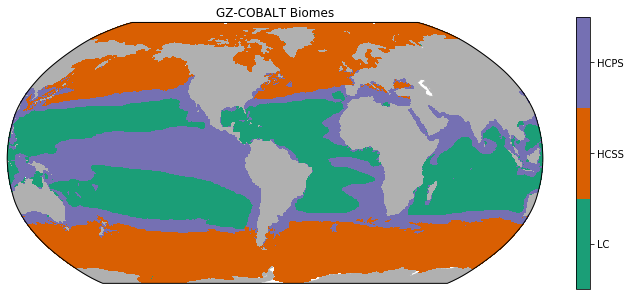

In [38]:
cmap = matplotlib.colors.ListedColormap(["#1b9e77", "#d95f02", "#7570b3"])
norm = matplotlib.colors.BoundaryNorm([1,2,3,4], cmap.N) 


plt.figure(figsize=(12,5))
ax=plt.axes(projection=ccrs.Robinson(central_longitude=300.0))
cs=ax.pcolormesh(grid.geolon.values, grid.geolat.values, biomes.biomes, transform=ccrs.PlateCarree(), cmap=cmap, norm=norm)
ax.add_feature(cartopy.feature.LAND, zorder=0, facecolor='#b0b0b0')
cbar=plt.colorbar(cs, ticks=[1.5,2.5,3.5])
cbar.ax.set_yticklabels(['LC', 'HCSS', 'HCPS'])
ax.set_title('GZ-COBALT Biomes')

## Figure - Seasonal Cycle compared with Control

#### Shift southern hemisphere months

In [39]:
dss = ds.drop([v for v in ds if v not in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']])
dcs = dc.drop([v for v in dc if v not in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']])

In [40]:
for var in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']:
    SH_subset = dss[var].where(ds.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = dss[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    dss[svar] = xr.DataArray(full_field, dims=dss[var].dims, coords=dss[var].coords)

dss

<xarray.Dataset>
Dimensions:         (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh              (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh              (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l             (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time            (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv              (nv) float64 1.0 2.0
Data variables:
    nsmz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nmdz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nsmt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022_b
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Thu Feb 10 22:05:29 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [41]:
for var in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100']:
    SH_subset = dcs[var].where(dc.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = dcs[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    dcs[svar] = xr.DataArray(full_field, dims=dcs[var].dims, coords=dcs[var].coords)

dcs

<xarray.Dataset>
Dimensions:         (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh              (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh              (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l             (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time            (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv              (nv) float64 1.0 2.0
Data variables:
    nsmz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nmdz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgz_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nsmt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
    nlgt_100_shift  (time, yh, xh) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Wed Feb 16 10:32:11 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

#### Plot

In [42]:
c1='#1b9e77'#'#440154FF'
c2='#d95f02'#'#21908CFF'
c3='#7570b3'#'#FDE725FF'

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=c1, lw=2),
                Line2D([0], [0], color=c2, lw=2),
                Line2D([0], [0], color=c3, lw=2),
                Line2D([0], [0], color=c1, ls='--', lw=2),
                Line2D([0], [0], color=c2, ls='--', lw=2),
                Line2D([0], [0], color=c3, ls='--', lw=2)]


In [43]:
labels=['a','b','c','d','e']
if '_d' in case:
    labels=['f','g','h','i','j']
if '_e' in case:
    labels=['k','l','m','n','o']
print(labels)

['a', 'b', 'c', 'd', 'e']


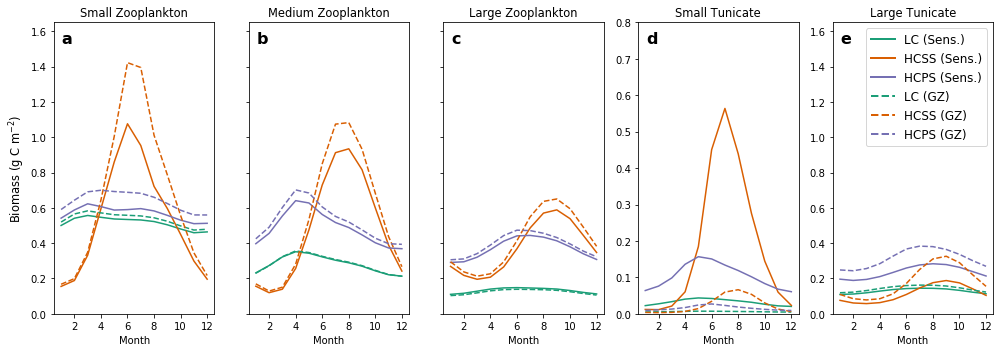

In [48]:
fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,5)

ymax1 = 1.65
fig.add_subplot(gs[0,0])
(dss.nsmz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1, ylim=(0,ymax1))
(dss.nsmz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nsmz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nsmz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nsmz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nsmz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Small Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('Biomass (g C m$^{-2}$)', fontsize=11.5)
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, labels[0], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,1])
(dss.nmdz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax1))
(dss.nmdz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nmdz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nmdz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nmdz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nmdz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Medium Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, labels[1], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,2])
(dss.nlgz_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax1))
(dss.nlgz_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nlgz_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nlgz_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nlgz_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nlgz_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Large Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, labels[2], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


ymax2 = 0.2
if '_b' in case:
    ymax2=0.8
fig.add_subplot(gs[0,3])
(dss.nsmt_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax2))
(dss.nsmt_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nsmt_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nsmt_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nsmt_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nsmt_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Small Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
#plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, labels[3], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

fig.add_subplot(gs[0,4])
(dss.nlgt_100_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ylim=(0,ymax1))
(dss.nlgt_100_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2)
(dss.nlgt_100_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3)
(dcs.nlgt_100_shift.where(cbiomes.biomes==1).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c1,ls='--')
(dcs.nlgt_100_shift.where(cbiomes.biomes==2).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c2,ls='--')
(dcs.nlgt_100_shift.where(cbiomes.biomes==3).mean(dim=['xh','yh'])*molN_to_gC).plot(c=c3,ls='--')
plt.gca().set_title('Large Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
#plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, labels[4], transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')
plt.legend(custom_lines,['LC (Sens.)','HCSS (Sens.)','HCPS (Sens.)','LC (GZ)','HCSS (GZ)','HCPS (GZ)'], fontsize=12)



plt.tight_layout()

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SensvsBase_SeasonalCycleBiomass-Comb.png', dpi=300, bbox_inches='tight')

In [45]:
#  P/B plots

In [22]:
ds2 = ds.drop([v for v in ds if v not in ['nsmz_100','nmdz_100','nlgz_100','nsmt_100','nlgt_100', 'jprod_nsmz_100','jprod_nmdz_100','jprod_nlgz_100','jprod_nsmt_100','jprod_nlgt_100']])
ds2

<xarray.Dataset>
Dimensions:         (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh              (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh              (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l             (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * z_i             (z_i) float64 0.0 5.0 15.0 ... 5.75e+03 6.25e+03 6.75e+03
  * time            (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv              (nv) float64 1.0 2.0
Data variables:
    nsmz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100        (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nsmz_100  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nmdz_100  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nlgz_100  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nsmt_100  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nlgt_100  (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022_a
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Thu Feb 10 22:04:53 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

In [23]:
ds2['PB_smz_month'] = ds2.jprod_nsmz_100 * 86400 / ds2.nsmz_100
ds2['PB_mdz_month'] = ds2.jprod_nmdz_100 * 86400 / ds2.nmdz_100
ds2['PB_lgz_month'] = ds2.jprod_nlgz_100 * 86400 / ds2.nlgz_100
ds2['PB_smt_month'] = ds2.jprod_nsmt_100 * 86400 / ds2.nsmt_100
ds2['PB_lgt_month'] = ds2.jprod_nlgt_100 * 86400 / ds2.nlgt_100

In [24]:
for var in ['PB_smz_month','PB_mdz_month','PB_lgz_month','PB_smt_month','PB_lgt_month']:
    SH_subset = ds2[var].where(ds.yh < 0,drop=True).values
    SH_subset = np.roll(SH_subset, shift=6, axis=0)
    full_field = ds2[var].values
    full_field[:,0:np.size(SH_subset, axis=1),:] = SH_subset

    svar = var + '_shift'
    ds2[svar] = xr.DataArray(full_field, dims=ds2[var].dims, coords=ds2[var].coords)

ds2

<xarray.Dataset>
Dimensions:             (nv: 2, time: 12, xh: 720, yh: 576, z_i: 36, z_l: 35)
Coordinates:
  * xh                  (xh) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * yh                  (yh) float64 -77.91 -77.72 -77.54 ... 89.47 89.68 89.89
  * z_l                 (z_l) float64 2.5 10.0 20.0 ... 5.5e+03 6e+03 6.5e+03
  * z_i                 (z_i) float64 0.0 5.0 15.0 ... 6.25e+03 6.75e+03
  * time                (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * nv                  (nv) float64 1.0 2.0
Data variables: (12/20)
    nsmz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nmdz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgz_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nsmt_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    nlgt_100            (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    jprod_nsmz_100      (time, yh, xh) float32 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    ...                  ...
    PB_lgt_month        (time, yh, xh) float64 dask.array<chunksize=(1, 576, 720), meta=np.ndarray>
    PB_smz_month_shift  (time, yh, xh) float64 nan nan nan nan ... nan nan nan
    PB_mdz_month_shift  (time, yh, xh) float64 nan nan nan nan ... nan nan nan
    PB_lgz_month_shift  (time, yh, xh) float64 nan nan nan nan ... nan nan nan
    PB_smt_month_shift  (time, yh, xh) float64 nan nan nan nan ... nan nan nan
    PB_lgt_month_shift  (time, yh, xh) float64 nan nan nan nan ... nan nan nan
Attributes:
    filename:          ocean_cobalt_fdet_100.1988-1992.01.nc
    title:             OM4p5_CORE2_IAF_gzCOBALT-013022_a
    associated_files:  areacello: 19880101.ocean_static.nc
    grid_type:         regular
    grid_tile:         N/A
    comment:           FMS time averaging, version 3.0, precision=double
    history:           Thu Feb 10 22:04:53 2022: ncra -O /archive/Jessica.Luo...
    NCO:               netCDF Operators version 4.8.1 (Homepage = http://nco....

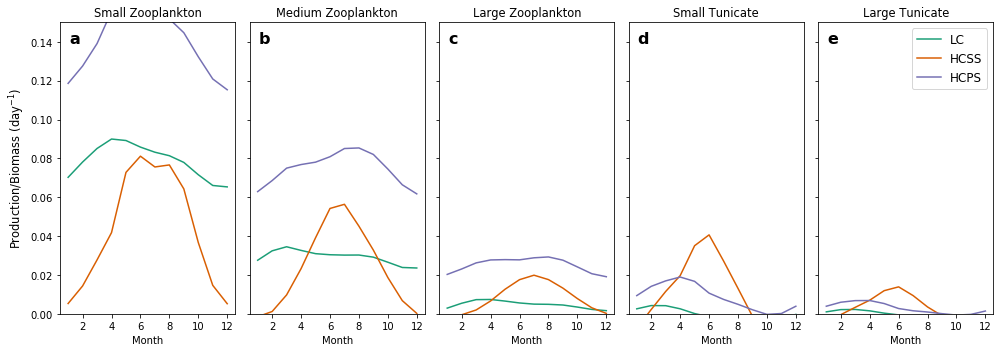

In [25]:

c1='#1b9e77'#'#440154FF'
c2='#d95f02'#'#21908CFF'
c3='#7570b3'#'#FDE725FF'

fig=plt.figure(figsize=(14,5))
gs=gridspec.GridSpec(1,5)

ymax1 = 0.15
fig.add_subplot(gs[0,0])
(ds2.PB_smz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1, ylim=(0,ymax1))
(ds2.PB_smz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_smz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Small Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('Production/Biomass (day$^{-1})$', fontsize=11.5)
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,1])
(ds2.PB_mdz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax1))
(ds2.PB_mdz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_mdz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Medium Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,2])
(ds2.PB_lgz_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax1))
(ds2.PB_lgz_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_lgz_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Large Zooplankton', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'c', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


ymax2 = ymax1
fig.add_subplot(gs[0,3])
(ds2.PB_smt_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax2))
(ds2.PB_smt_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_smt_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Small Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'd', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')


fig.add_subplot(gs[0,4])
(ds2.PB_lgt_month_shift.where(biomes.biomes==1).mean(dim=['xh','yh'])).plot(c=c1,ylim=(0,ymax2))
(ds2.PB_lgt_month_shift.where(biomes.biomes==2).mean(dim=['xh','yh'])).plot(c=c2)
(ds2.PB_lgt_month_shift.where(biomes.biomes==3).mean(dim=['xh','yh'])).plot(c=c3)
plt.gca().set_title('Large Tunicate', fontsize=11.5)
plt.gca().set_ylabel('')
plt.gca().yaxis.set_ticklabels([])
plt.gca().set_xlabel('Month')
plt.gca().set_xticks(ticks=[2,4,6,8,10,12])
plt.gca().text(0.05, 0.97, 'e', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')
plt.legend(['LC','HCSS','HCPS'], fontsize=12)


plt.tight_layout()

plt.savefig('plots/'+fig_casename+'_'+pp_dates+'_SeasonalCycle_ProdBiomass.png', dpi=300, bbox_inches='tight')